# SVM (Final Model)

In [5]:
#Loading Required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
import shap
from sklearn.inspection import permutation_importance

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import numpy as np

from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')
from sklearn.ensemble import IsolationForest

## Using normal data to create SVM

For uniformity among the results we are using train and test set which are split previously.

In [6]:
X_train=pd.read_csv('Data/Normal/X_train.csv')
X_test=pd.read_csv('Data/Normal/X_test.csv')
y_test=pd.read_csv('Data/Normal/y_test.csv')
y_train=pd.read_csv('Data/Normal/y_train.csv')


Selecting only the frequencies  we got through feature selection using XG boost, As we found the other variables are overfitting ML models



In [7]:

X_train=X_train[['f(408.4789)', 'f(2593.6791)', 'f(2378.4142)', 'f(2310.7054)', 'f(7127.1897)', 'f(865.5366)', 'f(6727.1713)', 'f(226.0000)', 'f(458.5020)', 'f(500.0000)', 'f(1029.3022)', 'f(5993.2283)', 'f(1887.7486)', 'f(1373.9536)', 'f(667.4199)', 'f(2747.9073)', 'f(1296.8396)', 'f(577.6763)', 'f(1155.3527)', 'f(1090.5077)']]
X_test=X_test[['f(408.4789)', 'f(2593.6791)', 'f(2378.4142)', 'f(2310.7054)', 'f(7127.1897)', 'f(865.5366)', 'f(6727.1713)', 'f(226.0000)', 'f(458.5020)', 'f(500.0000)', 'f(1029.3022)', 'f(5993.2283)', 'f(1887.7486)', 'f(1373.9536)', 'f(667.4199)', 'f(2747.9073)', 'f(1296.8396)', 'f(577.6763)', 'f(1155.3527)', 'f(1090.5077)']]

### Scaling

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

We found using min-max scaler was taking more into account the outliers. Using standard scaler instead for better results


# Grid Search

In [ ]:
#Using Grid Search to find the optimal hyper parameters for the svm model

svm_linear = {'C': [0.1, 1, 10, 100, 1000], 
              'kernel': ['linear']} 
svm_others = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001,'auto'], 
              'kernel': ['poly', 'rbf', 'sigmoid']}

parameters = [svm_linear, svm_others]

  
grid = GridSearchCV(SVC(), param_grid=parameters, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)
# print best parameter after tuning 


Fitting 5 folds for each of 95 candidates, totalling 475 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.897 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.974 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.921 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.974 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.895 total time=   0.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.923 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear;, score=0.974 total time=   0.0s
[CV 3/5] END ................C=1, kernel=linear;, score=0.895 total time=   0.0s
[CV 4/5] END ................C=1, kernel=linear;, score=0.947 total time=   0.0s
[CV 5/5] END ................C=1, kernel=linear;, score=0.895 total time=   0.0s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.923 total time=   0.0s
[CV 2/5] END ...............C=10, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'auto'],
                          'kernel': ['poly', 'rbf', 'sigmoid']}],
             verbose=3)

In [ ]:
#Printing the best parameters for the best svm model
print(grid.best_params_) 

{'C': 10, 'gamma': 0.01, 'kernel': 'sigmoid'}


In [9]:
#Create a svm Classifier

clf = svm.SVC(C=10,gamma =0.01,kernel='sigmoid',probability=True)

In [10]:
#Train the model using the training sets
clf.fit(X_train, y_train)
y_pred_tr=clf.predict(X_train)
# Finding accuracy, F1 score, Recall Score, Precision Score of the training set

print ("Accuracy score of training set:",round(accuracy_score(y_train, y_pred_tr),4))
print ("F1 Score of training set:",round(f1_score(y_train, y_pred_tr),4))
print ("Recall score of training set:",round(recall_score(y_train, y_pred_tr),4))
print ("Precision score of training set:",round(precision_score(y_train, y_pred_tr),4))




Accuracy score of training set: 0.9372
F1 Score of training set: 0.7857
Recall score of training set: 0.7333
Precision score of training set: 0.8462


In [11]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Finding accuracy, F1 score, Recall Score, Precision Score of the test set

print ("Accuracy score of test set:",round(accuracy_score(y_test, y_pred),4))
print ("F1 Score of test set:",round(f1_score(y_test, y_pred),4))
print ("Recall score of test set:",round(recall_score(y_test, y_pred),4))
print ("Precision score of test set:",round(precision_score(y_test, y_pred),4))

Accuracy score of test set: 0.9375
F1 Score of test set: 0.8
Recall score of test set: 0.75
Precision score of test set: 0.8571


Here we are getting 94% accuracy in the test set

In [12]:
#Converting the data back to dataframe from array for shap plots
X_test = pd.DataFrame(X_test, columns=['f(408.4789)', 'f(2593.6791)', 'f(2378.4142)', 'f(2310.7054)', 'f(7127.1897)', 'f(865.5366)', 'f(6727.1713)', 'f(226.0000)', 'f(458.5020)', 'f(500.0000)', 'f(1029.3022)', 'f(5993.2283)', 'f(1887.7486)', 'f(1373.9536)', 'f(667.4199)', 'f(2747.9073)', 'f(1296.8396)', 'f(577.6763)', 'f(1155.3527)', 'f(1090.5077)'])
X_train = pd.DataFrame(X_train, columns=['f(408.4789)', 'f(2593.6791)', 'f(2378.4142)', 'f(2310.7054)', 'f(7127.1897)', 'f(865.5366)', 'f(6727.1713)', 'f(226.0000)', 'f(458.5020)', 'f(500.0000)', 'f(1029.3022)', 'f(5993.2283)', 'f(1887.7486)', 'f(1373.9536)', 'f(667.4199)', 'f(2747.9073)', 'f(1296.8396)', 'f(577.6763)', 'f(1155.3527)', 'f(1090.5077)'])

In [13]:
# explain all the predictions in the test set
shap.initjs() 
    # use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(clf.predict_proba, X_train, nsamples=100, link="logit")
shap_values = explainer.shap_values(X_test)



Using 191 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 48/48 [01:40<00:00,  2.10s/it]


In [23]:
# SHAP values for all predictions and the direction of their impact

shap.initjs()

shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

In [24]:
shap.initjs()
    # plot the SHAP values  output of the first instance
shap.force_plot(explainer.expected_value[0], shap_values[0][0, :], X_test.iloc[0, :], link="logit")

In [25]:
#Force Plot for a single observation for a single class 0
shap.initjs() 

shap.force_plot(explainer.expected_value[1], shap_values[1][0, :], X_test.iloc[0, :], link="logit")

## Shap Summary Plot

Here We can see how each feature impacts for each class is shown.

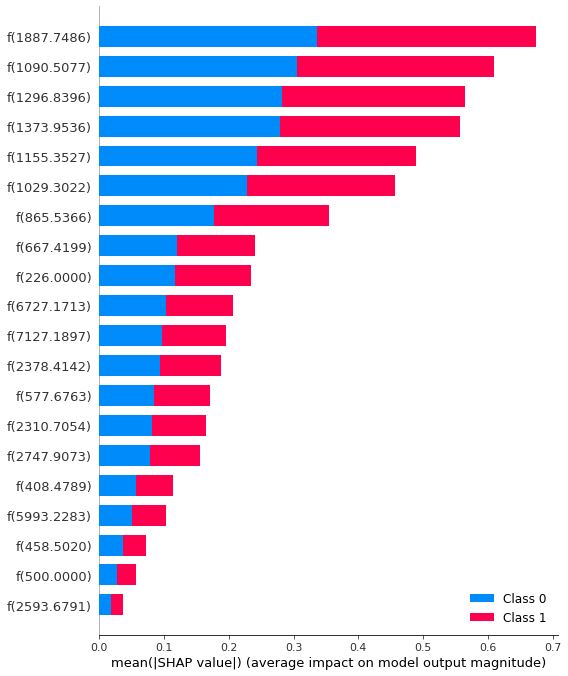

In [17]:
shap.initjs()
shap.summary_plot(shap_values, X_test)

## Summary plot for single class

Red means low feature value and blue means high feature value. 

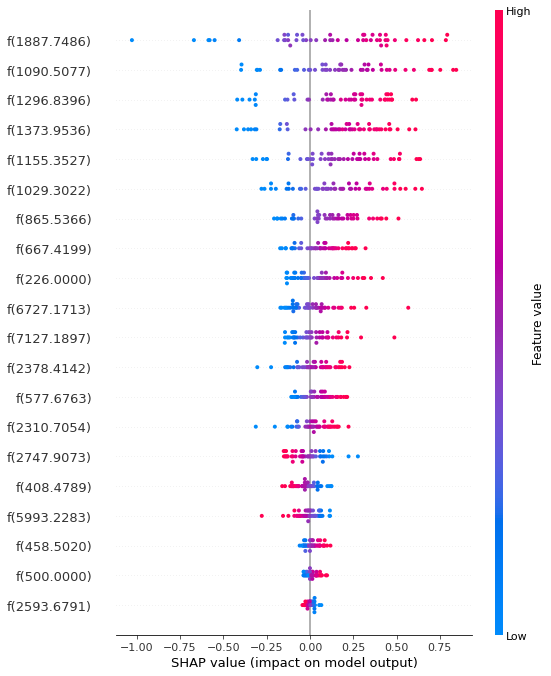

In [21]:
shap.initjs()
shap.summary_plot(shap_values[0], X_test)

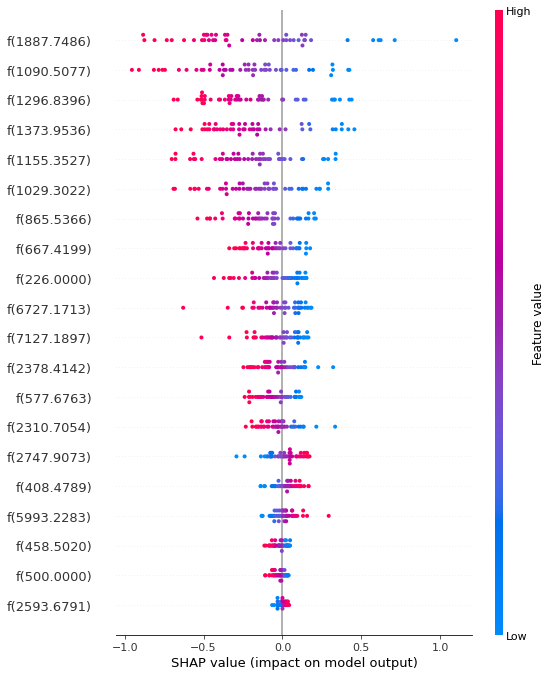

In [ ]:
shap.initjs()
shap.summary_plot(shap_values[1], X_test)